# Indexing and Slicing

### Setting up the data

In [1]:
import numpy as np

In [15]:
# a vector: the argument to the array function is a Python list
v = np.random.rand(10)
v

array([ 0.37188258,  0.55062526,  0.91109445,  0.52792531,  0.02249503,
        0.98267557,  0.4525032 ,  0.22061845,  0.43624253,  0.51826583])

In [16]:
# a matrix: the argument to the array function is a nested Python list
M = np.random.rand(10, 2)
M

array([[ 0.91728287,  0.17639295],
       [ 0.14874153,  0.8201578 ],
       [ 0.33937767,  0.29744809],
       [ 0.89336889,  0.38915789],
       [ 0.45762626,  0.21877071],
       [ 0.23448393,  0.8950091 ],
       [ 0.89477702,  0.03326833],
       [ 0.34073951,  0.69822947],
       [ 0.58063668,  0.38180403],
       [ 0.09361408,  0.24731792]])

## Indexing

We can index elements in an array using the square bracket and indices:

In [17]:
# v is a vector, and has only one dimension, taking one index
v[0]

0.37188257782888778

In [18]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

0.82015780105919578

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [19]:
M

array([[ 0.91728287,  0.17639295],
       [ 0.14874153,  0.8201578 ],
       [ 0.33937767,  0.29744809],
       [ 0.89336889,  0.38915789],
       [ 0.45762626,  0.21877071],
       [ 0.23448393,  0.8950091 ],
       [ 0.89477702,  0.03326833],
       [ 0.34073951,  0.69822947],
       [ 0.58063668,  0.38180403],
       [ 0.09361408,  0.24731792]])

In [20]:
M[1]

array([ 0.14874153,  0.8201578 ])

The same thing can be achieved with using `:` instead of an index: 

In [21]:
M[1,:] # row 1

array([ 0.14874153,  0.8201578 ])

In [22]:
M[:,1] # column 1

array([ 0.17639295,  0.8201578 ,  0.29744809,  0.38915789,  0.21877071,
        0.8950091 ,  0.03326833,  0.69822947,  0.38180403,  0.24731792])

We can assign new values to elements in an array using indexing:

In [23]:
M[0,0] = 1

In [24]:
M

array([[ 1.        ,  0.17639295],
       [ 0.14874153,  0.8201578 ],
       [ 0.33937767,  0.29744809],
       [ 0.89336889,  0.38915789],
       [ 0.45762626,  0.21877071],
       [ 0.23448393,  0.8950091 ],
       [ 0.89477702,  0.03326833],
       [ 0.34073951,  0.69822947],
       [ 0.58063668,  0.38180403],
       [ 0.09361408,  0.24731792]])

In [26]:
# also works for rows and columns
M[1,:] = 0
M[:,1] = -1

In [27]:
M

array([[ 1.        , -1.        ],
       [ 0.        , -1.        ],
       [ 0.33937767, -1.        ],
       [ 0.89336889, -1.        ],
       [ 0.45762626, -1.        ],
       [ 0.23448393, -1.        ],
       [ 0.89477702, -1.        ],
       [ 0.34073951, -1.        ],
       [ 0.58063668, -1.        ],
       [ 0.09361408, -1.        ]])

## Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [28]:
a = np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

In [29]:
a[1:3]

array([2, 3])

Array slices are **mutable**: if they are assigned a new value the original array from which the slice was extracted is modified:

In [30]:
a[1:3] = [-2,-3]

a

array([ 1, -2, -3,  4,  5])

* We can omit any of the three parameters in `M[lower:upper:step]`:

In [32]:
a[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [33]:
a[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [34]:
a[:3] # first three elements

array([ 1, -2, -3])

In [35]:
a[3:] # elements from index 3

array([4, 5])

* Negative indices counts from the end of the array (positive index from the begining):

In [36]:
a = np.array([1,2,3,4,5])

In [37]:
a[-1] # the last element in the array

5

In [38]:
a[-3:] # the last three elements

array([3, 4, 5])

* Index slicing works exactly the same way for multidimensional arrays:

In [39]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [40]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [41]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

## Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [42]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [43]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

* We can also index **masks**: 

    - If the index mask is an Numpy array of with data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position each element: 

In [46]:
b = np.array([n for n in range(5)])
b

array([0, 1, 2, 3, 4])

In [47]:
row_mask = np.array([True, False, True, False, False])
b[row_mask]

array([0, 2])

* Alternatively:

In [49]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
b[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [50]:
x = np.arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [51]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [52]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

## Indexing and Array Memory Management

Numpy arrays support two different way of storing data into memory, namely

* F-Contiguous 
    - i.e. *column-wise* storage, Fortran-like
* C-Contiguous
    - i.e. *row-wise* storage, C-like
    
The **storage** strategy is controlled by the parameter `order` of `np.array`

<img src="images/storage_simple.png" />

Let's an example

In [17]:
import numpy as np
FC = np.array([[1, 2, 3],    [4, 5, 6], 
               [7, 8, 9],    [10, 11, 12]], order='F')

In [18]:
CC = np.array([[1, 2, 3],    [4, 5, 6], 
               [7, 8, 9],    [10, 11, 12]], order='C')

* **Note**: no changes in meaning for indexing operations

In [19]:
FC[0, 1]

2

In [20]:
CC[0, 1]

2

In [21]:
FC.shape

(4, 3)

In [22]:
CC.shape

(4, 3)

<img src="images/storage_index.png" />

## Functions for extracting data from arrays and creating arrays

### `np.where`

The index mask can be converted to position index using the `np.where` function

In [53]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [54]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

### `np.diag`

With the `np.diag` function we can also extract the diagonal and subdiagonals of an array:

In [55]:
np.diag(A)

array([ 0, 11, 22, 33, 44])

In [56]:
np.diag(A, -1)

array([10, 21, 32, 43])

### `np.take`

The `np.take` function is similar to fancy indexing described above:

In [57]:
v2 = np.arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [58]:
row_indices = [1, 3, 5]
v2[row_indices] # fancy indexing

array([-2,  0,  2])

In [59]:
v2.take(row_indices)

array([-2,  0,  2])

* But `take` also works on lists and other objects:

In [79]:
np.take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### `np.choose`

Constructs and array by picking elements form several arrays:

In [60]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

np.choose(which, choices)

array([ 5, -2,  5, -2])

In [6]:
import numpy as np

## Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

In [79]:
data = np.random.randn(77431, 3)
months_of_the_year = np.arange(1, 13)
data[:, 1] = np.random.choice(months_of_the_year, size=data.shape[0])

In [80]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [81]:
mask_feb = data[:,1] == 2

### Brief Preview (of some of the things presented in next notebooks)

In [82]:
# compute the mean of values in column 2 (the third one)
np.mean(data[mask_feb,2])

0.013449501337473352

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

In [83]:
%matplotlib inline

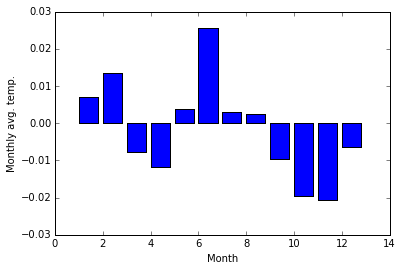

In [84]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 2]) for month in months]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

# Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [85]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [10]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


* When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [87]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [88]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

# Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [89]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [90]:
Theta(array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle with vector input... 

To get a vectorized version of Theta we can use the Numpy function `np.vectorize`. In many cases it can automatically vectorize a function:

### `np.vectorize`

In [91]:
Theta_vec = np.vectorize(Theta)

In [92]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

### `np.frompyfunc`

**Universal functions** (Ufuncs) work on arrays, element-by-element, or on scalars. 

Ufuncs accept a set of scalars as input, and produce a set of scalars as output.

In [105]:
Theta_vec = np.frompyfunc(Theta, 1, 1)
print("Result: ", ufunc(np.arange(4)))

Result:  [1 1 1 1]


## Excercise

### Avoiding Vectorize

* Implement the function to accept vector input from the beginning 
    - This requires "more effort" but might give better performance

In [ ]:
# %load "solutions/sol_021.py"
def Theta(x):
    """
    Vector-aware implementation of the Heaviside step function.
    """
    return 1 * (x >= 0)
    
## Testing the function
print(Theta(array([-3,-2,-1,0,1,2,3])))

# and also works with scalars as well
print(Theta(-1.2), Theta(2.6))

# Using arrays in conditions

When using arrays in conditions in for example `if` statements and other boolean expressions, one need to use one of `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [11]:
M

array([[1, 2],
       [3, 4]])

In [15]:
if (M > 1).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [14]:
if (M > 0).all():
    print("all elements in M are larger than 5")
else:
    print("not all elements in M are larger than 5")

all elements in M are larger than 5


In [16]:
M>0

array([[ True,  True],
       [ True,  True]], dtype=bool)